In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

red_wine = pd.read_csv('https://query.data.world/s/rrj4d2f6sj2apz4x7sozpd6epmrsiy')
white_wine = pd.read_csv('https://query.data.world/s/brho7trfnuy4iz2nxraqzsfwvgek5b')

high_quality = white_wine.loc[ white_wine['quality'] > 6 ]   #ratings 9, 8, 7 only, 1060 rows
mid_quality_initial = white_wine.loc[ white_wine['quality'] < 7 ]
mid_quality = mid_quality_initial.loc[ mid_quality_initial['quality'] > 4 ]   #ratings 5, 6 only, 3655 rows
low_quality = white_wine.loc[ white_wine['quality'] < 5 ]   #ratings 3, 4 only, 183 rows
mid_and_low_quality = white_wine.loc[ white_wine['quality'] < 7 ]   #ratings 3, 4, 5, 6 only, 3838 rows

In [3]:
def confidence_interval(dataset, confidence_decimal, rounded, threshold):
    acsd_sort = np.sort(dataset)
    bottom_threshold = ( ((1-confidence_decimal)/2) - threshold )*np.sum(acsd_sort)
    upper_threshold = ( ((1-confidence_decimal)/2) + threshold )*np.sum(acsd_sort)
    top_summation = 0
    bottom_summation = 0
    bottom_range = 0
    top_range = 0

    for i in range(100000):
        top_summation += acsd_sort[ len(acsd_sort) - i - 1 ]
        bottom_summation += acsd_sort[i]

        if top_summation > bottom_threshold and top_summation < upper_threshold:
            top_range = acsd_sort[ len(acsd_sort) - i - 1 ]

        if bottom_summation > bottom_threshold and bottom_summation < upper_threshold:
            bottom_range = acsd_sort[i]


    print( str(round(bottom_range,rounded)) + " - " + str(round(top_range,rounded)) )
    return;

It was discovered that an alcohol level < 8.6 corresponds 100% of the time to low or mid quality wine. To gain further insights I will come up with 90% alcohol confidence intervals for high, mid, and low quality wines wines.

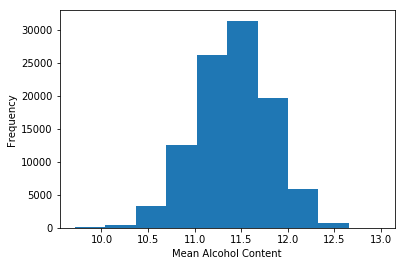

We are 90% confident that the mean alcohol content for high quality wine is: 
10.77 - 12.07
Mean value: 11.42


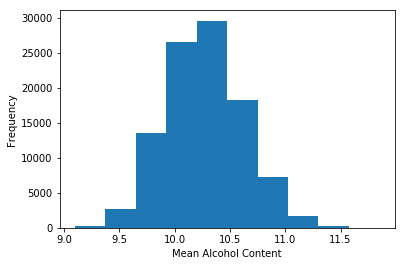

We are 90% confident that the mean alcohol content for mid quality wine is: 
9.73 - 10.88
Mean value: 10.27


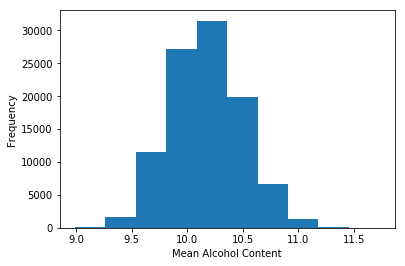

We are 90% confident that the mean alcohol content for low quality wine is: 
9.67 - 10.74
Mean value: 10.17


In [3]:
#Alcohol Analysis

#High quality wine
high_quality_alcohol_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['alcohol'], size=10 )
    high_quality_alcohol_dist[i] = np.mean(random_sample)

plt.hist(high_quality_alcohol_dist, bins=10)
plt.xlabel("Mean Alcohol Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean alcohol content for high quality wine is: ")
confidence_interval(high_quality_alcohol_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(high_quality_alcohol_dist),2)) )


#Mid quality wine
mid_quality_alcohol_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['alcohol'], size=10 )
    mid_quality_alcohol_dist[i] = np.mean(random_sample)

plt.hist(mid_quality_alcohol_dist, bins=10)
plt.xlabel("Mean Alcohol Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean alcohol content for mid quality wine is: ")
confidence_interval(mid_quality_alcohol_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(mid_quality_alcohol_dist),2)) )

#Low Quality
low_quality_alcohol_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['alcohol'], size=10 )
    low_quality_alcohol_dist[i] = np.mean(random_sample)

plt.hist(low_quality_alcohol_dist, bins=10)
plt.xlabel("Mean Alcohol Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean alcohol content for low quality wine is: ")
confidence_interval(low_quality_alcohol_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(low_quality_alcohol_dist),2)) )

Taking another look at the dataset, it was discovered that a density greater than 1.0006 corresponds to mid quality wine 100% of the time and a density lower than 0.9872 corresponds to high quality wine 100% of the time. Additionaly, it is observed that the median value tends to be lower for high quality wine. Now I will calculate the 90% confidence interval of the median value for high, mid, and low quality wine.

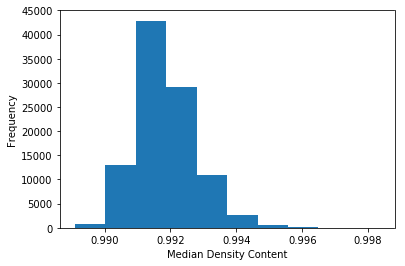

We are 90% confident that the median density for high quality wine is: 
0.99059 - 0.9935
Mean value: 0.99185


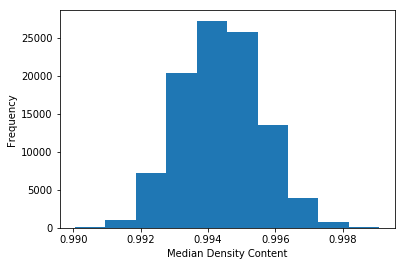

We are 90% confident that the median density for mid quality wine is: 
0.9925 - 0.99634
Mean value: 0.99438


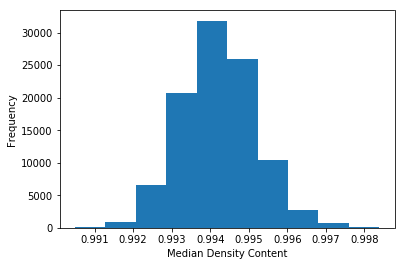

We are 90% confident that the median density for low quality wine is: 
0.9927 - 0.99583
Mean value: 0.99421


In [11]:
#Density Analysis

#High quality wine
high_quality_density_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['density'], size=10 )
    high_quality_density_dist[i] = np.median(random_sample)

plt.hist(high_quality_density_dist, bins=10)
plt.xlabel("Median Density Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median density for high quality wine is: ")
confidence_interval(high_quality_density_dist, 0.90, 5, 0.00001)
print("Mean value: " + str(round(np.mean(high_quality_density_dist),5)) )


#Mid quality wine
mid_quality_density_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['density'], size=10 )
    mid_quality_density_dist[i] = np.median(random_sample)

plt.hist(mid_quality_density_dist, bins=10)
plt.xlabel("Median Density Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median density for mid quality wine is: ")
confidence_interval(mid_quality_density_dist, 0.90, 5, 0.00001)
print("Mean value: " + str(round(np.mean(mid_quality_density_dist),5)) )

#Low Quality
low_quality_density_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['density'], size=10 )
    low_quality_density_dist[i] = np.median(random_sample)

plt.hist(low_quality_density_dist, bins=10)
plt.xlabel("Median Density Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median density for low quality wine is: ")
confidence_interval(low_quality_density_dist, 0.90, 5, 0.00001)
print("Mean value: " + str(round(np.mean(low_quality_density_dist),5)) )

It was discovered that a 'total sulfur dioxide' content less than 34 and greater than 229 corresponds to a mid or low quality wine. Another look also tells us that a 'total sulfur dioxide' greater than 344 corresponds to a low quality wine all the time. For further predictive power I will calculate a 90% interval on the median value of 'total sulfur dioxide' for high, mid, and low quality wine.

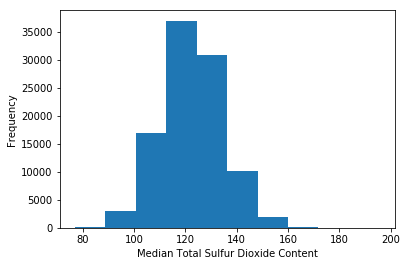

We are 90% confident that the median total sulfur dioxide for high quality wine is: 
104.5 - 144.5
Mean value: 122.59


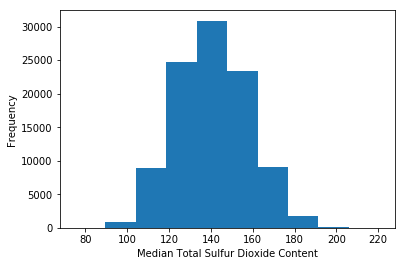

We are 90% confident that the median total sulfur dioxide for mid quality wine is: 
115.5 - 172.0
Mean value: 140.83


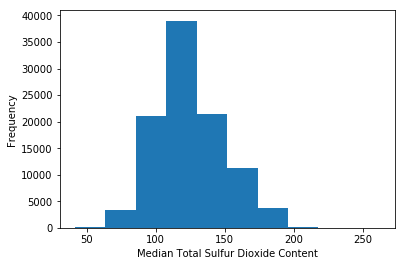

We are 90% confident that the median total sulfur dioxide for low quality wine is: 
93.5 - 175.0
Mean value: 124.62


In [5]:
#total sulfur dioxide Analysis

#High quality wine
high_quality_total_sulfur_dioxide_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['total sulfur dioxide'], size=10 )
    high_quality_total_sulfur_dioxide_dist[i] = np.median(random_sample)

plt.hist(high_quality_total_sulfur_dioxide_dist, bins=10)
plt.xlabel("Median Total Sulfur Dioxide Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median total sulfur dioxide for high quality wine is: ")
confidence_interval(high_quality_total_sulfur_dioxide_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(high_quality_total_sulfur_dioxide_dist),2)) )


#Mid quality wine
mid_quality_total_sulfur_dioxide_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['total sulfur dioxide'], size=10 )
    mid_quality_total_sulfur_dioxide_dist[i] = np.median(random_sample)

plt.hist(mid_quality_total_sulfur_dioxide_dist, bins=10)
plt.xlabel("Median Total Sulfur Dioxide Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median total sulfur dioxide for mid quality wine is: ")
confidence_interval(mid_quality_total_sulfur_dioxide_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(mid_quality_total_sulfur_dioxide_dist),2)) )


#Low Quality
low_quality_total_sulfur_dioxide_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['total sulfur dioxide'], size=10 )
    low_quality_total_sulfur_dioxide_dist[i] = np.median(random_sample)

plt.hist(low_quality_total_sulfur_dioxide_dist, bins=10)
plt.xlabel("Median Total Sulfur Dioxide Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median total sulfur dioxide for low quality wine is: ")
confidence_interval(low_quality_total_sulfur_dioxide_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(low_quality_total_sulfur_dioxide_dist),2)) )

From previous obserations we see that a 'free sulfur dioxide' content greater than 108 corresponds to a mid or low level wine 100% of the time and a 'free sulfur dioxide' greater than 131 corresponds to a low quality wine 100% of the time. Now I will calculate 90% confidence intervals for the median value of 'free sulfur dioxide' content for high, mid, and low quality wines.

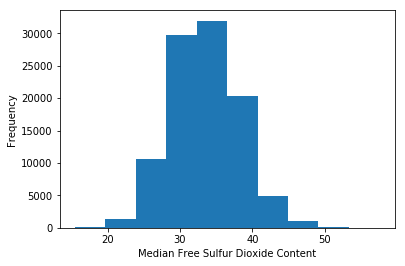

We are 90% confident that the median free sulfur dioxide for high quality wine is: 
27.0 - 42.0
Mean value: 33.42


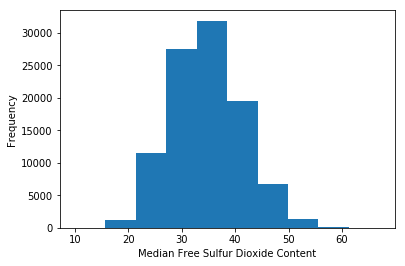

We are 90% confident that the median free sulfur dioxide for mid quality wine is: 
25.5 - 47.5
Mean value: 34.63


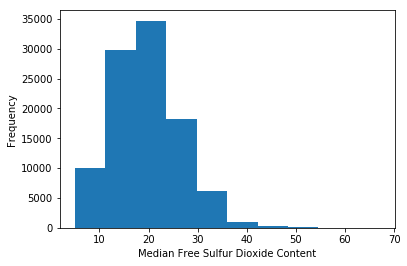

We are 90% confident that the median free sulfur dioxide for low quality wine is: 
11.5 - 34.0
Mean value: 19.56


In [6]:
#free sulfur dioxide Analysis

#High quality wine
high_quality_free_sulfur_dioxide_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['free sulfur dioxide'], size=10 )
    high_quality_free_sulfur_dioxide_dist[i] = np.median(random_sample)

plt.hist(high_quality_free_sulfur_dioxide_dist, bins=10)
plt.xlabel("Median Free Sulfur Dioxide Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median free sulfur dioxide for high quality wine is: ")
confidence_interval(high_quality_free_sulfur_dioxide_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(high_quality_free_sulfur_dioxide_dist),2)) )


#Mid quality wine
mid_quality_free_sulfur_dioxide_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['free sulfur dioxide'], size=10 )
    mid_quality_free_sulfur_dioxide_dist[i] = np.median(random_sample)

plt.hist(mid_quality_free_sulfur_dioxide_dist, bins=10)
plt.xlabel("Median Free Sulfur Dioxide Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median free sulfur dioxide for mid quality wine is: ")
confidence_interval(mid_quality_free_sulfur_dioxide_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(mid_quality_free_sulfur_dioxide_dist),2)) )


#Low Quality
low_quality_free_sulfur_dioxide_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['free sulfur dioxide'], size=10 )
    low_quality_free_sulfur_dioxide_dist[i] = np.median(random_sample)

plt.hist(low_quality_free_sulfur_dioxide_dist, bins=10)
plt.xlabel("Median Free Sulfur Dioxide Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median free sulfur dioxide for low quality wine is: ")
confidence_interval(low_quality_free_sulfur_dioxide_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(low_quality_free_sulfur_dioxide_dist),2)) )

In previous observations we saw that a chloride content greater than 0.135 corresponds 100% of the time to mid or low quality wine. Another look we see that a chloride content less than 0.012 corresponds 100% of the time to mid quality wine. Now I will compute a 90% confience interval of the mean chloride for high, mid and low quality wines.

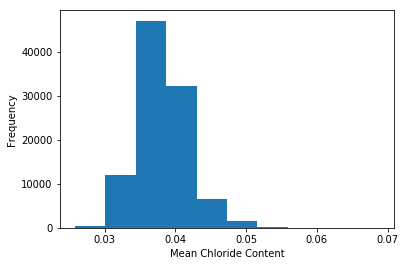

We are 90% confident that the mean chloride content for high quality wine is: 
0.0332 - 0.045
Mean value: 0.03817


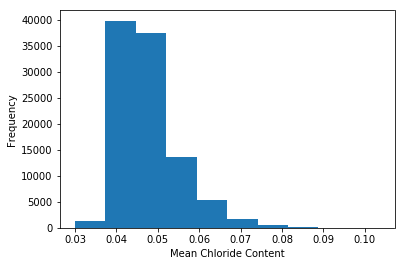

We are 90% confident that the mean chloride content for mid quality wine is: 
0.0397 - 0.0646
Mean value: 0.04771


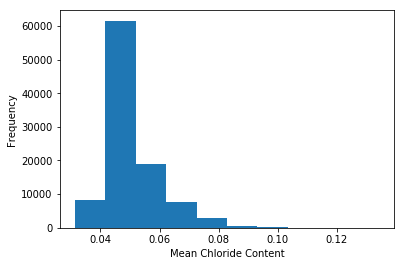

We are 90% confident that the mean chloride content for low quality wine is: 
0.0411 - 0.0733
Mean value: 0.05059


In [12]:
#Clorides Analysis

#High quality wine
high_quality_chloride_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['chlorides'], size=10 )
    high_quality_chloride_dist[i] = np.mean(random_sample)

plt.hist(high_quality_chloride_dist, bins=10)
plt.xlabel("Mean Chloride Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean chloride content for high quality wine is: ")
confidence_interval(high_quality_chloride_dist, 0.90, 5, 0.00001)
print("Mean value: " + str(round(np.mean(high_quality_chloride_dist),5)) )


#Mid quality wine
mid_quality_chloride_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['chlorides'], size=10 )
    mid_quality_chloride_dist[i] = np.mean(random_sample)

plt.hist(mid_quality_chloride_dist, bins=10)
plt.xlabel("Mean Chloride Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean chloride content for mid quality wine is: ")
confidence_interval(mid_quality_chloride_dist, 0.90, 5, 0.00001)
print("Mean value: " + str(round(np.mean(mid_quality_chloride_dist),5)) )


#Low Quality
low_quality_chloride_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['chlorides'], size=10 )
    low_quality_chloride_dist[i] = np.mean(random_sample)

plt.hist(low_quality_chloride_dist, bins=10)
plt.xlabel("Mean Chloride Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean chloride content for low quality wine is: ")
confidence_interval(low_quality_chloride_dist, 0.90, 5, 0.00001)
print("Mean value: " + str(round(np.mean(low_quality_chloride_dist),5)) )

Taking another look at the 'residual sugar' data, I see that a 'residual sugar' less than 0.8 corresponds 100% of the time to mid or low quality wine and a 'residual sugar' greater than 17.55 corresponds to a mid or high quality wine 100% of the time. Now will calculate the 90% confidence interval of median 'residual sugar' values for high, mid, and low quality wine.

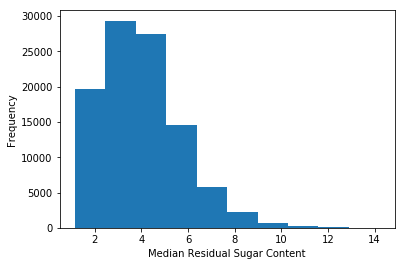

We are 90% confident that the median residual sugar for high quality wine is: 
2.15 - 8.18
Mean value: 4.04


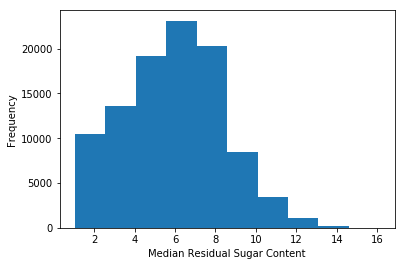

We are 90% confident that the median residual sugar for mid quality wine is: 
3.0 - 10.9
Mean value: 5.95


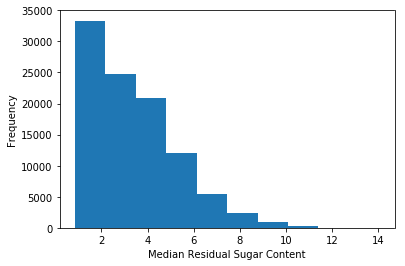

We are 90% confident that the median residual sugar for low quality wine is: 
1.55 - 8.4
Mean value: 3.45


In [8]:
#residual sugar Analysis

#High quality wine
high_quality_residual_sugar_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['residual sugar'], size=10 )
    high_quality_residual_sugar_dist[i] = np.median(random_sample)

plt.hist(high_quality_residual_sugar_dist, bins=10)
plt.xlabel("Median Residual Sugar Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median residual sugar for high quality wine is: ")
confidence_interval(high_quality_residual_sugar_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(high_quality_residual_sugar_dist),2)) )


#Mid quality wine
mid_quality_residual_sugar_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['residual sugar'], size=10 )
    mid_quality_residual_sugar_dist[i] = np.median(random_sample)

plt.hist(mid_quality_residual_sugar_dist, bins=10)
plt.xlabel("Median Residual Sugar Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median residual sugar for mid quality wine is: ")
confidence_interval(mid_quality_residual_sugar_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(mid_quality_residual_sugar_dist),2)) )


#Low Quality
low_quality_residual_sugar_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['residual sugar'], size=10 )
    low_quality_residual_sugar_dist[i] = np.median(random_sample)

plt.hist(low_quality_residual_sugar_dist, bins=10)
plt.xlabel("Median Residual Sugar Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the median residual sugar for low quality wine is: ")
confidence_interval(low_quality_residual_sugar_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(low_quality_residual_sugar_dist),2)) )

It was observed that a 'citric acid' level above 0.75 or below 0.29 corresponds to a mid or low quality wine. Another look and we see that a 'citric acid level' above 0.74 corresponds to a mid or low quality wine all the time and a 'citric acid' below 0.29 corresponds to all quality ratings 7 and below. To further gain insights I will calculate 90% confidence intervals on the mean 'citric acid' content for high, mid and low quality wine. 

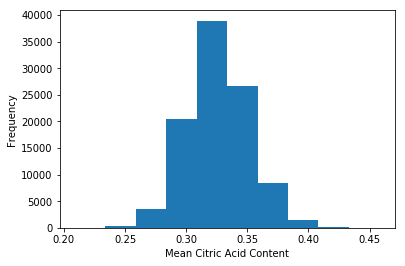

We are 90% confident that the mean citric acid for high quality wine is: 
0.288 - 0.371
Mean value: 0.326


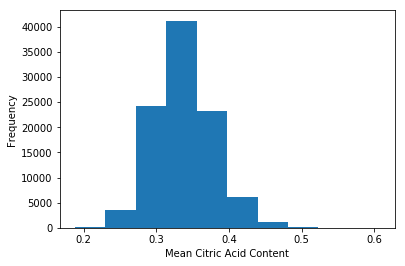

We are 90% confident that the mean citric acid for mid quality wine is: 
0.281 - 0.414
Mean value: 0.338


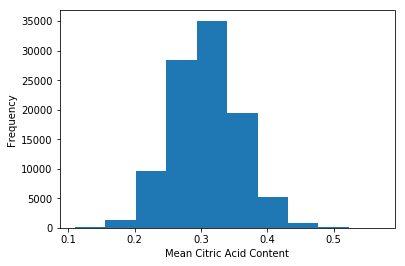

We are 90% confident that the mean citric acid for low quality wine is: 
0.237 - 0.399
Mean value: 0.308


In [12]:
#Citric Acid Analysis

#High quality wine
high_quality_citric_acid_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['citric acid'], size=10 )
    high_quality_citric_acid_dist[i] = np.mean(random_sample)

plt.hist(high_quality_citric_acid_dist, bins=10)
plt.xlabel("Mean Citric Acid Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean citric acid for high quality wine is: ")
confidence_interval(high_quality_citric_acid_dist, 0.90, 3, 0.001)
print("Mean value: " + str(round(np.mean(high_quality_citric_acid_dist),3)) )


#Mid quality wine
mid_quality_citric_acid_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['citric acid'], size=10 )
    mid_quality_citric_acid_dist[i] = np.mean(random_sample)

plt.hist(mid_quality_citric_acid_dist, bins=10)
plt.xlabel("Mean Citric Acid Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean citric acid for mid quality wine is: ")
confidence_interval(mid_quality_citric_acid_dist, 0.90, 3, 0.001)
print("Mean value: " + str(round(np.mean(mid_quality_citric_acid_dist),3)) )


#Low Quality
low_quality_citric_acid_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['citric acid'], size=10 )
    low_quality_citric_acid_dist[i] = np.mean(random_sample)

plt.hist(low_quality_citric_acid_dist, bins=10)
plt.xlabel("Mean Citric Acid Content")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean citric acid for low quality wine is: ")
confidence_interval(low_quality_citric_acid_dist, 0.90, 3, 0.001)
print("Mean value: " + str(round(np.mean(low_quality_citric_acid_dist),3)) )

It was observed that a 'volatile acidity' greater than 0.8 corresponds to mid or low quality wine. Another look and we see that a 'volatile acidity' above 0.76 corresponds to mid or low quality wine and a 'volatile acidity' below 0.11 corresponds to mid or high quality wine. To gain further insights I will compute the 90% confidence interval of the mean of 'volatile acidity' for high, mid and low quality wine.

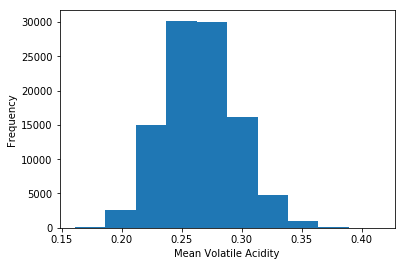

We are 90% confident that the mean volatile acidity for high quality wine is: 
0.222 - 0.32
Mean value: 0.265


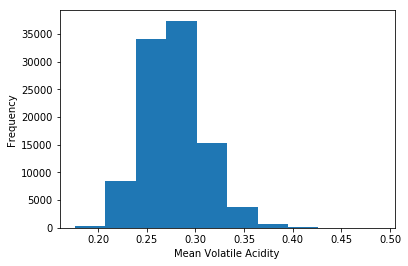

We are 90% confident that the mean volatile acidity for mid quality wine is: 
0.234 - 0.335
Mean value: 0.277


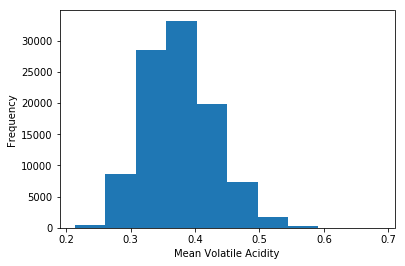

We are 90% confident that the mean volatile acidity for low quality wine is: 
0.301 - 0.48
Mean value: 0.376


In [17]:
#Volatile Acidity Analysis

#High quality wine
high_quality_volatile_acidity_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['volatile acidity'], size=10 )
    high_quality_volatile_acidity_dist[i] = np.mean(random_sample)

plt.hist(high_quality_volatile_acidity_dist, bins=10)
plt.xlabel("Mean Volatile Acidity")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean volatile acidity for high quality wine is: ")
confidence_interval(high_quality_volatile_acidity_dist, 0.90, 3, 0.0001)
print("Mean value: " + str(round(np.mean(high_quality_volatile_acidity_dist),3)) )


#Mid quality wine
mid_quality_volatile_acidity_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['volatile acidity'], size=10 )
    mid_quality_volatile_acidity_dist[i] = np.mean(random_sample)

plt.hist(mid_quality_volatile_acidity_dist, bins=10)
plt.xlabel("Mean Volatile Acidity")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean volatile acidity for mid quality wine is: ")
confidence_interval(mid_quality_volatile_acidity_dist, 0.90, 3, 0.0001)
print("Mean value: " + str(round(np.mean(mid_quality_volatile_acidity_dist),3)) )


#Low Quality
low_quality_volatile_acidity_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['volatile acidity'], size=10 )
    low_quality_volatile_acidity_dist[i] = np.mean(random_sample)

plt.hist(low_quality_volatile_acidity_dist, bins=10)
plt.xlabel("Mean Volatile Acidity")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean volatile acidity for low quality wine is: ")
confidence_interval(low_quality_volatile_acidity_dist, 0.90, 3, 0.0001)
print("Mean value: " + str(round(np.mean(low_quality_volatile_acidity_dist),3)) )

I was observed that a 'fixed acidity' greater than 9.2 corresponds to low quality wine. Taking another look this conclusion is confirmed. To gain further insights I will compute the 90% confidence interval of the mean 'fixed acidity' for high, mid and low quality wine.

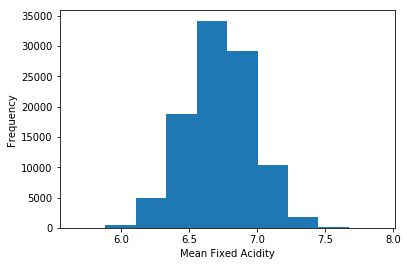

We are 90% confident that the mean fixed acidity for high quality wine is: 
6.33 - 7.13
Mean value: 6.724


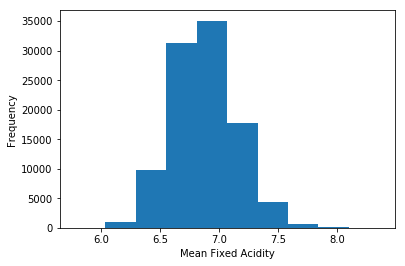

We are 90% confident that the mean fixed acidity for mid quality wine is: 
6.46 - 7.34
Mean value: 6.876


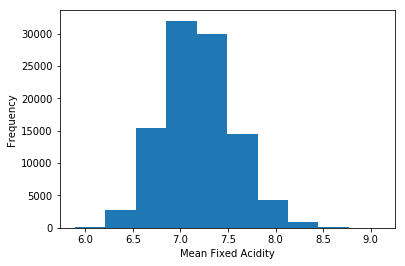

We are 90% confident that the mean fixed acidity for low quality wine is: 
6.62 - 7.84
Mean value: 7.181


In [23]:
#Fixed Acidity Analysis

#High quality wine
high_quality_fixed_acidity_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['fixed acidity'], size=10 )
    high_quality_fixed_acidity_dist[i] = np.mean(random_sample)

plt.hist(high_quality_fixed_acidity_dist, bins=10)
plt.xlabel("Mean Fixed Acidity")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean fixed acidity for high quality wine is: ")
confidence_interval(high_quality_fixed_acidity_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(high_quality_fixed_acidity_dist),2)) )


#Mid quality wine
mid_quality_fixed_acidity_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['fixed acidity'], size=10 )
    mid_quality_fixed_acidity_dist[i] = np.mean(random_sample)

plt.hist(mid_quality_fixed_acidity_dist, bins=10)
plt.xlabel("Mean Fixed Acidity")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean fixed acidity for mid quality wine is: ")
confidence_interval(mid_quality_fixed_acidity_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(mid_quality_fixed_acidity_dist),2)) )


#Low Quality
low_quality_fixed_acidity_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['fixed acidity'], size=10 )
    low_quality_fixed_acidity_dist[i] = np.mean(random_sample)

plt.hist(low_quality_fixed_acidity_dist, bins=10)
plt.xlabel("Mean Fixed Acidity")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean fixed acidity for low quality wine is: ")
confidence_interval(low_quality_fixed_acidity_dist, 0.90, 2, 0.0001)
print("Mean value: " + str(round(np.mean(low_quality_fixed_acidity_dist),2)) )

It was observed that a sulphates content below 0.28 or greater than 3.55 corresponds to mid quality wine. Taking another look we see that a sulphates contetent below 0.25 or greater than 0.87 corresponds to mid or high quality wine. We also see that a sulphates content below 0.23 and greater than 1.06 corresponds to a high quality wine. I will now take the 90% confidence interval of sulphates for high, mid, and low quality wine.

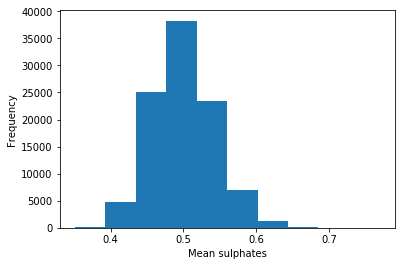

We are 90% confident that the mean sulphates content for high quality wine is: 
0.44 - 0.58
Mean value: 0.5


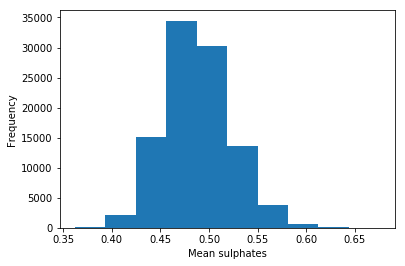

We are 90% confident that the mean sulphates content for mid quality wine is: 
0.44 - 0.55
Mean value: 0.49


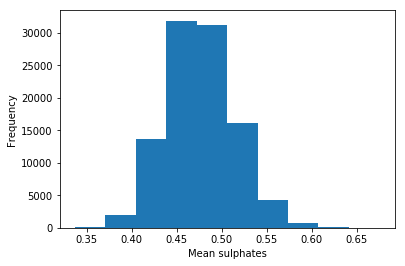

We are 90% confident that the mean sulphates content for low quality wine is: 
0.42 - 0.54
Mean value: 0.48


In [33]:
#sulphates Analysis

#High quality wine
high_quality_sulphates_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['sulphates'], size=10 )
    high_quality_sulphates_dist[i] = np.mean(random_sample)

plt.hist(high_quality_sulphates_dist, bins=10)
plt.xlabel("Mean sulphates")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean sulphates content for high quality wine is: ")
confidence_interval(high_quality_sulphates_dist, 0.90, 2, 0.001)
print("Mean value: " + str(round(np.mean(high_quality_sulphates_dist),2)) )


#Mid quality wine
mid_quality_sulphates_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['sulphates'], size=10 )
    mid_quality_sulphates_dist[i] = np.mean(random_sample)

plt.hist(mid_quality_sulphates_dist, bins=10)
plt.xlabel("Mean sulphates")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean sulphates content for mid quality wine is: ")
confidence_interval(mid_quality_sulphates_dist, 0.90, 2, 0.001)
print("Mean value: " + str(round(np.mean(mid_quality_sulphates_dist),2)) )


#Low Quality
low_quality_sulphates_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['sulphates'], size=10 )
    low_quality_sulphates_dist[i] = np.mean(random_sample)

plt.hist(low_quality_sulphates_dist, bins=10)
plt.xlabel("Mean sulphates")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean sulphates content for low quality wine is: ")
confidence_interval(low_quality_sulphates_dist, 0.90, 2, 0.001)
print("Mean value: " + str(round(np.mean(low_quality_sulphates_dist),2)) )

There was no observed correspondance of pH to the quality of wine. To gain some more insights I will compute the 90% confidence interval of pH for high, mid, low quality wine.

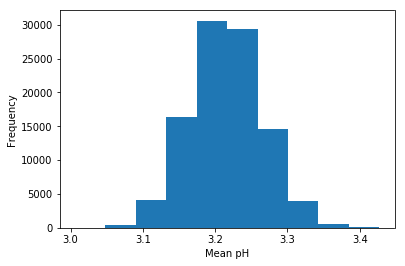

We are 90% confident that the mean pH content for high quality wine is: 
3.14 - 3.3
Mean value: 3.22


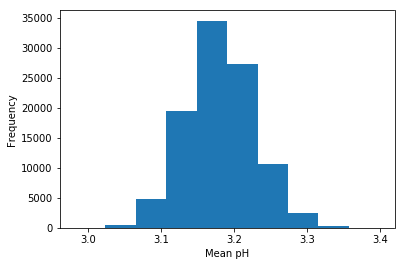

We are 90% confident that the mean pH content for mid quality wine is: 
3.11 - 3.26
Mean value: 3.18


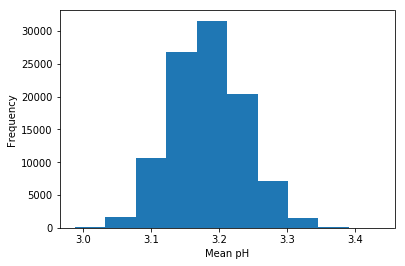

We are 90% confident that the mean pH content for low quality wine is: 
3.1 - 3.27
Mean value: 3.18


In [34]:
#pH Analysis

#High quality wine
high_quality_pH_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( high_quality['pH'], size=10 )
    high_quality_pH_dist[i] = np.mean(random_sample)

plt.hist(high_quality_pH_dist, bins=10)
plt.xlabel("Mean pH")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean pH content for high quality wine is: ")
confidence_interval(high_quality_pH_dist, 0.90, 2, 0.001)
print("Mean value: " + str(round(np.mean(high_quality_pH_dist),2)) )


#Mid quality wine
mid_quality_pH_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( mid_quality['pH'], size=10 )
    mid_quality_pH_dist[i] = np.mean(random_sample)

plt.hist(mid_quality_pH_dist, bins=10)
plt.xlabel("Mean pH")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean pH content for mid quality wine is: ")
confidence_interval(mid_quality_pH_dist, 0.90, 2, 0.001)
print("Mean value: " + str(round(np.mean(mid_quality_pH_dist),2)) )


#Low Quality
low_quality_pH_dist = np.empty(100000)

for i in range(100000):
    random_sample = np.random.choice( low_quality['pH'], size=10 )
    low_quality_pH_dist[i] = np.mean(random_sample)

plt.hist(low_quality_pH_dist, bins=10)
plt.xlabel("Mean pH")
plt.ylabel("Frequency")
plt.show()

print("We are 90% confident that the mean pH content for low quality wine is: ")
confidence_interval(low_quality_pH_dist, 0.90, 2, 0.001)
print("Mean value: " + str(round(np.mean(low_quality_pH_dist),2)) )

# Summary

Alcohol 90% confidence intervals
* High Quality: 10.77 - 12.07, mean = 11.42
* Mid Quality: 9.73 - 10.88, mean = 10.27
* Low Quality: 9.67 - 10.74, mean = 10.17

Density 90% confidence intervals
* High Quality: 0.99059 - 0.9935, mean = 0.99185
* Mid Quality: 0.9925 - 0.99634, mean = 0.99438
* Low Quality: 0.9927 - 0.99583, mean = 0.99421

Total Sulfur Dioxide 90% confidence intervals
* High Quality: 104.5 - 144.5, mean = 122.59
* Mid Quality: 115.5 - 172.0, mean = 140.83
* Low Quality: 93.5 - 175.0, mean = 124.62

Free Sulfur Dioxide 90% confidence intervals
* High Quality: 27.0 - 42.0, mean = 33.42
* Mid Quality: 25.5 - 47.5, mean = 34.63
* Low Quality: 11.5 - 34.0, mean = 19.56

Chloride 90% confidence intervals
* High Quality: 0.0332 - 0.045, mean = 0.03817
* Mid Quality: 0.0397 - 0.0646, mean = 0.04771
* Low Quality: 0.0411 - 0.0733, mean = 0.05059

Residual Sugar 90% confidence intervals
* High Quality: 2.15 - 8.18, mean = 4.04
* Mid Quality: 3.0 - 10.9, mean = 5.95
* Low Quality: 1.55 - 8.4, mean = 3.45

Citric Acid 90% confidence intervals
* High Quality: 0.288 - 0.371, mean = 0.326
* Mid Quality: 0.281 - 0.414, mean = 0.338
* Low Quality: 0.237 - 0.399, mean = 0.308

Volatile Acidity 90% confidence intervals
* High Quality: 0.222 - 0.32, mean = 0.265
* Mid Quality: 0.234 - 0.335, mean = 0.277
* Low Quality: 0.301 - 0.48, mean = 0.376

Fixed Acidity 90% confidence intervals
* High Quality: 6.33 - 7.13, mean = 6.724
* Mid Quality: 6.46 - 7.34, mean = 6.876
* Low Quality: 6.62 - 7.84, mean = 7.181

Sulphates 90% confidence intervals
* High Quality: 0.44 - 0.58, mean = 0.5
* Mid Quality: 0.44 - 0.55, mean = 0.49
* Low Quality: 0.42 - 0.54, mean = 0.48

pH 90% confidence intervals
* High Quality: 3.14 - 3.3, mean = 3.22
* Mid Quality: 3.11 - 3.26, mean = 3.18
* Low Quality: 3.1 - 3.27, mean = 3.18
